In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

%matplotlib inline
%config InlineBackend.figure_formats = 'svg'

warnings.filterwarnings('ignore')

In [186]:
table = {
    "columns": ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],  # column names

    "descriptions": [
        "0 = no diabetes, 1 = diabetes",
        "0 = no high BP, 1 = high BP",
        "0 = no high cholesterol, 1 = high cholesterol",
        "0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years",
        "Body Mass Index",
        "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes",
        "(Ever told) you had a stroke. 0 = no, 1 = yes",
        "Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes",
        "Physical activity in past 30 days - not including job. 0 = no, 1 = yes",
        "Consume fruit 1 or more times per day. 0 = no, 1 = yes",
        "Consume vegetables 1 or more times per day. 0 = no, 1 = yes",
        "Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (0, 1)",
        "Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0, 1)",
        "Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0, 1)",
        "Would you say that in general your health is: rate (1 ~ 5)",
        "Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)",
        "Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)",
        "Do you have serious difficulty walking or climbing stairs? (0, 1)",
        "Indicate sex of respondent (0, 1) (Female or Male)",
        "Fourteen-level age category (1 ~ 14)",
        "What is the highest grade or year of school you completed? (1 ~ 6)",
        "Is your annual household income from all sources: (If respondent refuses at any income level, code 'Refused.') (1 ~ 8)"
    ] # desc based on desc on kaggle
}
tabledf = pd.DataFrame(list(zip(table['columns'], table['descriptions'])), columns=["Column Name", "Description"])

# Display the DataFrame
print(tabledf)

             Column Name                                        Description
0        Diabetes_binary                      0 = no diabetes, 1 = diabetes
1                 HighBP                        0 = no high BP, 1 = high BP
2               HighChol      0 = no high cholesterol, 1 = high cholesterol
3              CholCheck  0 = no cholesterol check in 5 years, 1 = yes c...
4                    BMI                                    Body Mass Index
5                 Smoker  Have you smoked at least 100 cigarettes in you...
6                 Stroke      (Ever told) you had a stroke. 0 = no, 1 = yes
7   HeartDiseaseorAttack  Coronary heart disease (CHD) or myocardial inf...
8           PhysActivity  Physical activity in past 30 days - not includ...
9                 Fruits  Consume fruit 1 or more times per day. 0 = no,...
10               Veggies  Consume vegetables 1 or more times per day. 0 ...
11     HvyAlcoholConsump  Heavy drinkers (adult men having more than 14 ...
12         A

# Exploratory Data Analysis


In [189]:
Original_data =  pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv") # diabetes_binary_health_indicators_BRFSS2015.csv file
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv") # diabetes_binary_health_indicators_BRFSS2015.csv file
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [191]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [195]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [197]:
# Since none of the values can be decimal inputs (Check: Descriptions column in tabledf), we can convert the data from float type to int type withput
df = df.astype(int)

In [199]:
df.duplicated().sum() # check duplicated data

24206

In [201]:
df.drop_duplicates(inplace = True) # remove duplicated data

In [203]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [205]:
unique_value_count = {}

for i in df.columns:
    unique_value_count[i] =  df[i].nunique()

print(pd.DataFrame(unique_value_count , index=['unique value count']).T)

                      unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8


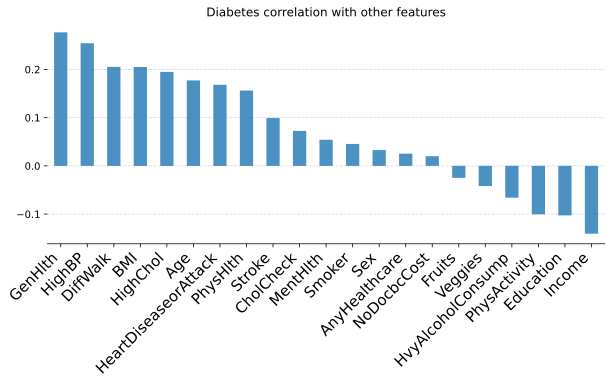

In [211]:
(df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(10, 4), title="Diabetes correlation with other features", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15)
plt.show();
# pairwise pearson correlation

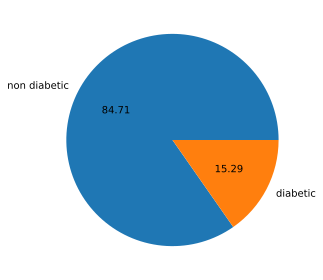

In [213]:
plt.pie(x= df.Diabetes_binary.value_counts() , labels=['non diabetic' , 'diabetic'] , autopct='%.02f')
plt.show();
# There is an imbalance in the data which is corrected before feeding data into ML model for testing and training.

## Examining Feature inputs

In [216]:
# Calculate the correlation of each column in df with the 'target' column

def visualize_feature(feature_name, df):
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Create a 3x1 grid of subplots

    # Pie chart
    df[feature_name].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
    axes[0].set_title(f'Pie Chart: {feature_name}')

    # Crosstab heatmap
    cross_tab = pd.crosstab(df[feature_name], df['Diabetes_binary'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
    axes[1].set_title(f'Cross-Tabulation: {feature_name} vs Diabetes_binary (%)')

    # Crosstab bar plot
    cross_tab.plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Bar Plot: {feature_name} vs Diabetes_binary')

    plt.tight_layout()
    plt.show()


### Feature Visualisation

#### High BP

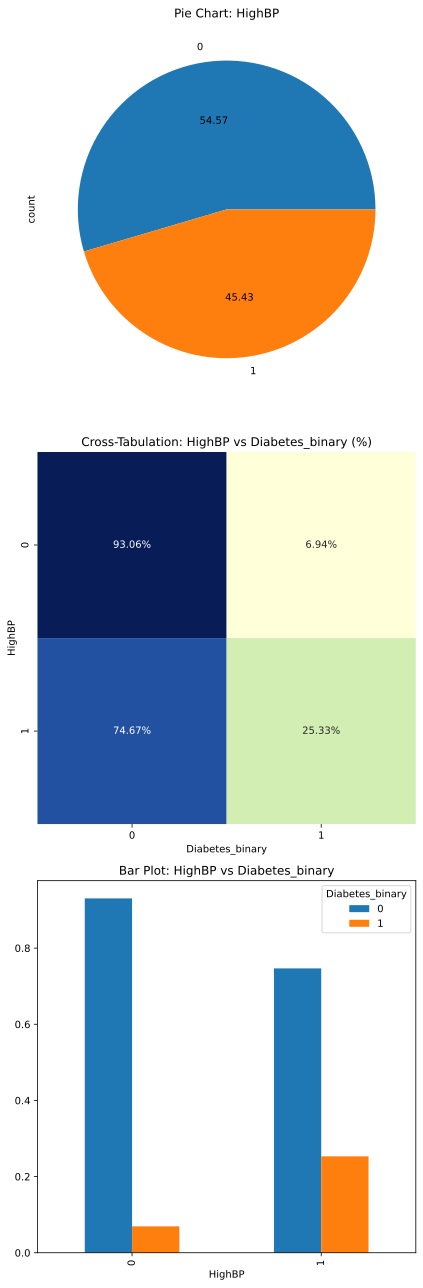

In [220]:
visualize_feature('HighBP' , df)

**Observations:** 

- People with Low Blood Pressure = (0) 
- People with High Blood Pressure = (1)

- We observed that those with low blood pressure are at a lower risk of developing diabetes than people with high blood pressure. We can see the higher the blood pressure, higher the risk of developing diabetes.

#### High Cholesterol

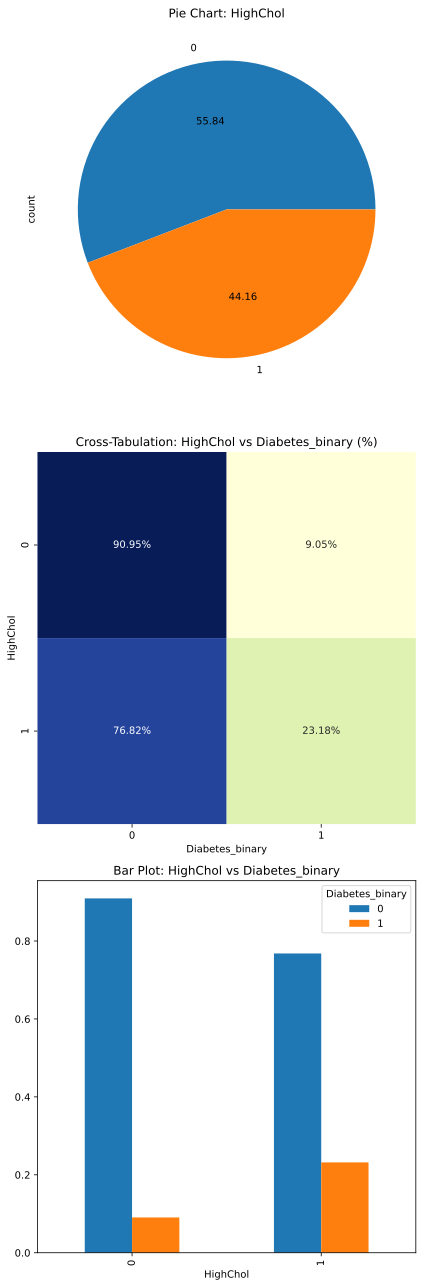

In [224]:
visualize_feature('HighChol' ,df)

**Observations:**
- People with Low Cholesterol Levels = (0)

- People with High Cholesterol Levels = (1)

- We observed that those with lower cholesterol has a lower risk of developing diabetes than people with high cholesterol. Meanwhile those with higher chosterol levels had a greater chance of developing diabetes.

#### HighChol * HighBP vs Diabetes

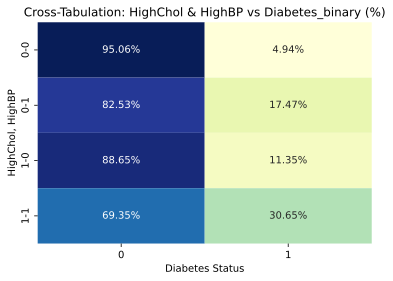

In [228]:
cross_tab = pd.crosstab([df.HighChol, df.HighBP], df.Diabetes_binary, normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2%", cbar=False)
plt.xlabel("Diabetes Status")
plt.ylabel("HighChol, HighBP")
plt.title("Cross-Tabulation: HighChol & HighBP vs Diabetes_binary (%)")
plt.show()


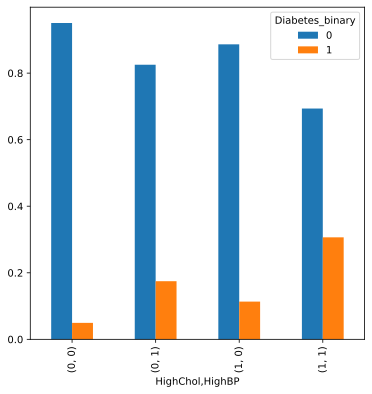

In [230]:
cross_tab.plot(kind = 'bar' , figsize = (6,6));
plt.show()

**Observations:**
- People who had both high cholesterol and high diabetes were are at a significantly greater indicator that a person may or already have developed diabetes.

#### BMI

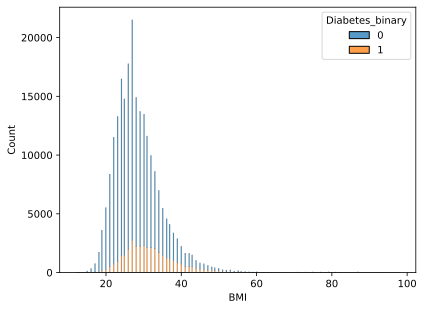

In [244]:
sns.histplot(df , x= df.BMI,hue=df.Diabetes_binary ,multiple='stack' );
plt.show()

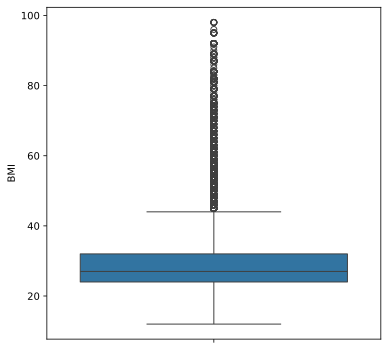

In [246]:
plt.figure(figsize = (6,6))
sns.boxplot(df.BMI);
plt.show()

**Observations:**
The number of diabetes cases is highest in the BMI range of 20-50, but this is also the range with the most data points.

- This means that the relationship between BMI and diabetes is not clear-cut.
- It is possible that the higher number of diabetes cases in this range is simply due to the fact that there are more people in this range.
- However, it is also possible that there is a real relationship between BMI and diabetes in this range.

#### Smoker

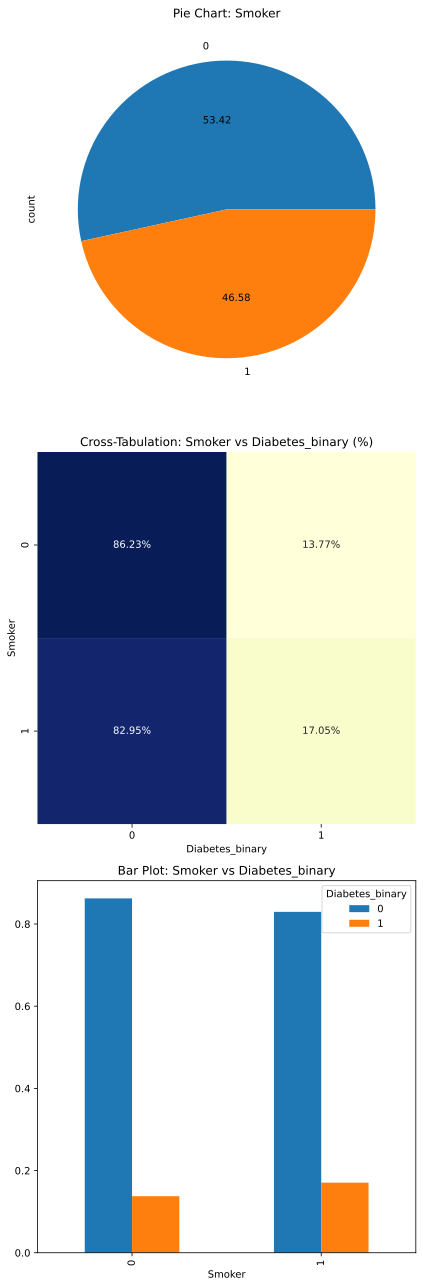

In [250]:
visualize_feature('Smoker' , df)

**Observations:**
- Based on the dataset provided, there was no significant connection between smoking and diabetes.
- However, it is worth noting that smoking does make the arteries more prone to atherosclerosis and increases the BP slightly. Thus it indirectly influences other factors related to diabetes.

#### Smoker * HvyAlcoholConsump vs Diabetes


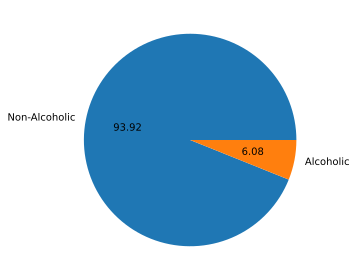

In [256]:
plt.pie(df.HvyAlcoholConsump.value_counts() , labels = ['Non-Alcoholic' , 'Alcoholic'] , autopct='%.2f');
plt.show()

The Data for HvyAlcohol consumption is highly imbalanced. This might explain why heavy alcohol consumption showed an inverse correlation with diabetes in the pairwse pearson analysis.

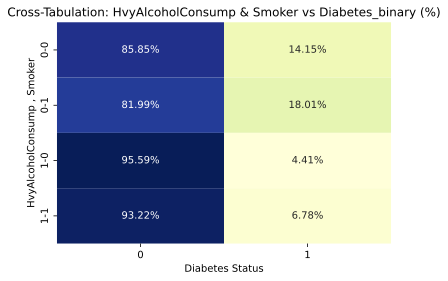

In [259]:
cross_tab = pd.crosstab([df.HvyAlcoholConsump, df.Smoker], df.Diabetes_binary, normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2%", cbar=False)
plt.xlabel("Diabetes Status")
plt.ylabel("HvyAlcoholConsump , Smoker")
plt.title("Cross-Tabulation: HvyAlcoholConsump & Smoker vs Diabetes_binary (%)")
plt.show()

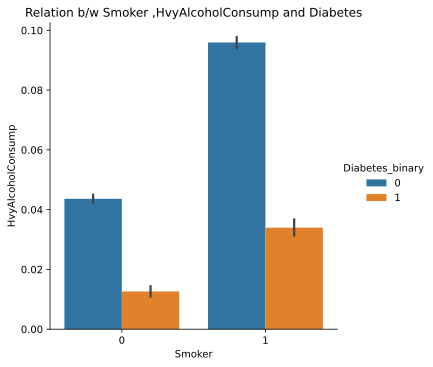

In [265]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = df , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes");
plt.show()

**Observation:**
Someone who both smokes and drinks has a significantly higher likelyhood of having diabetes. 


#### MentHlth,PhysHlth, DiffWalk, Stroke, HeartDiseaseorAttack, GenHlth

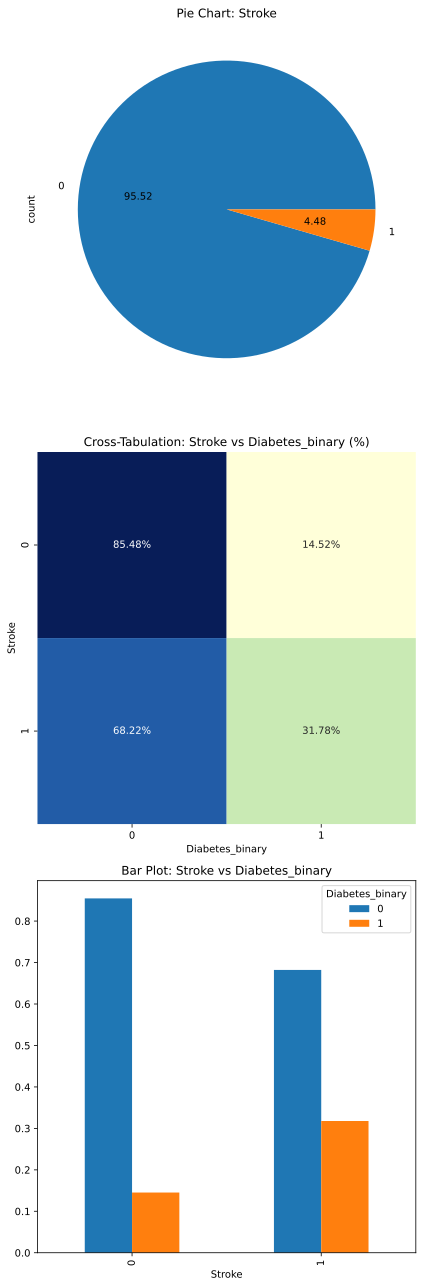

In [269]:
visualize_feature('Stroke' , df)

**Observations:**
Someone who has had a stroke has a significantly higher likelihood of having diabetes.

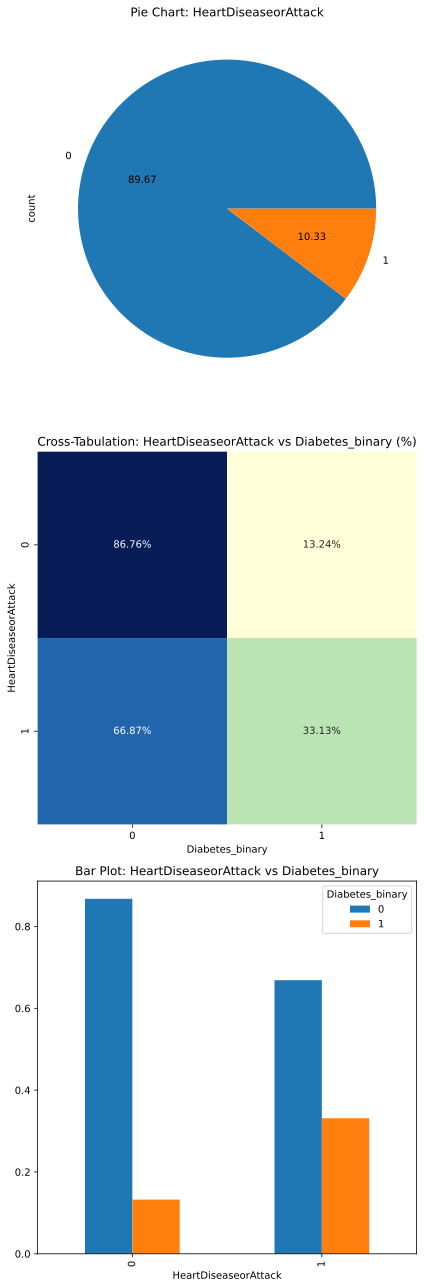

In [272]:
visualize_feature('HeartDiseaseorAttack' , df)

**Observations:**
Someone who both has a history of heart disease has a significantly higher likelihood of having diabetes.

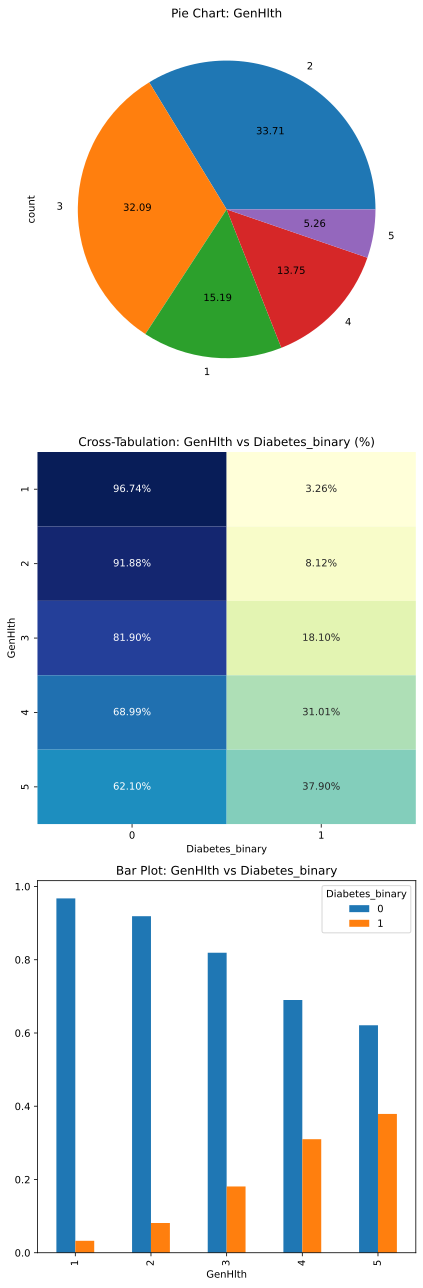

In [276]:
visualize_feature('GenHlth' , df)

**Observations:**
The health scale ranges from 1 to 5, where 1 indicates 'Excellent Health' and 5 indicates 'Poor Health'.
Here, individuals with poor health were more likely to have diabetes, than people who are healthy overall.

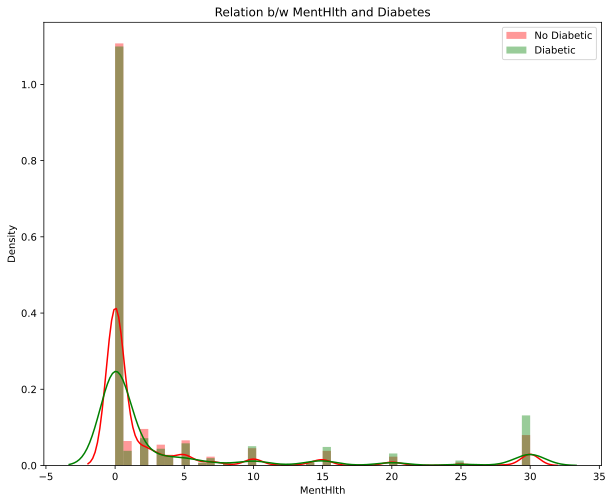

In [284]:
plt.figure(figsize=(10, 8))
warnings.filterwarnings('ignore')

sns.distplot(df.MentHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.MentHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()
plt.show()

**Observation:**
Poor mental health was a strong indicator of diabetes

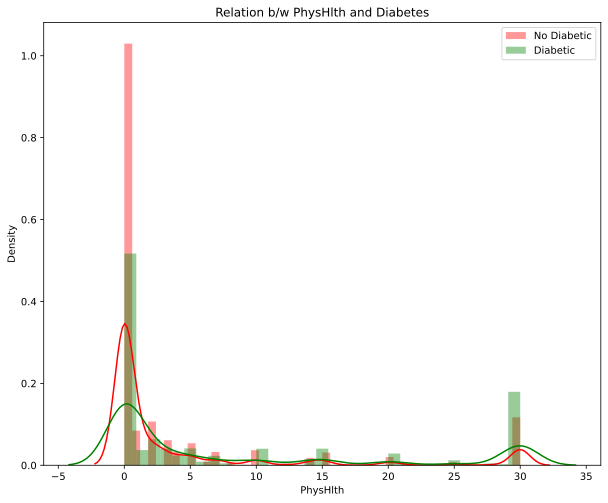

In [291]:
plt.figure(figsize=(10, 8))
warnings.filterwarnings('ignore')

sns.distplot(df.PhysHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.PhysHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w PhysHlth and Diabetes")

plt.legend()
plt.show()

**Observation:**
Poor physical health was also a strong indicator of diabetes

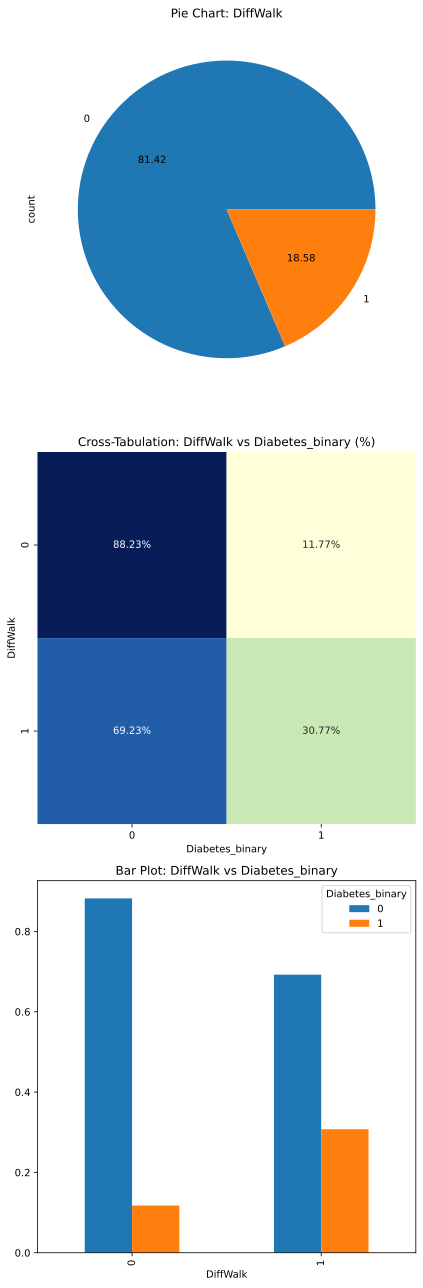

In [294]:
visualize_feature('DiffWalk' , df)

**Observation:**
- People who suffer from diabetes may experience difficulty in walking if their nerves are damaged due to excess glucose levels.
- It may also be that there is a confounding effect. Older people are more likely to develop diabetes and difficulty in walking, independant of one another. Thus the confounding effect of age might be magnifying the relation between difficulty in walking and diabetes.

#### AnyHealthcare, NoDocbcCost

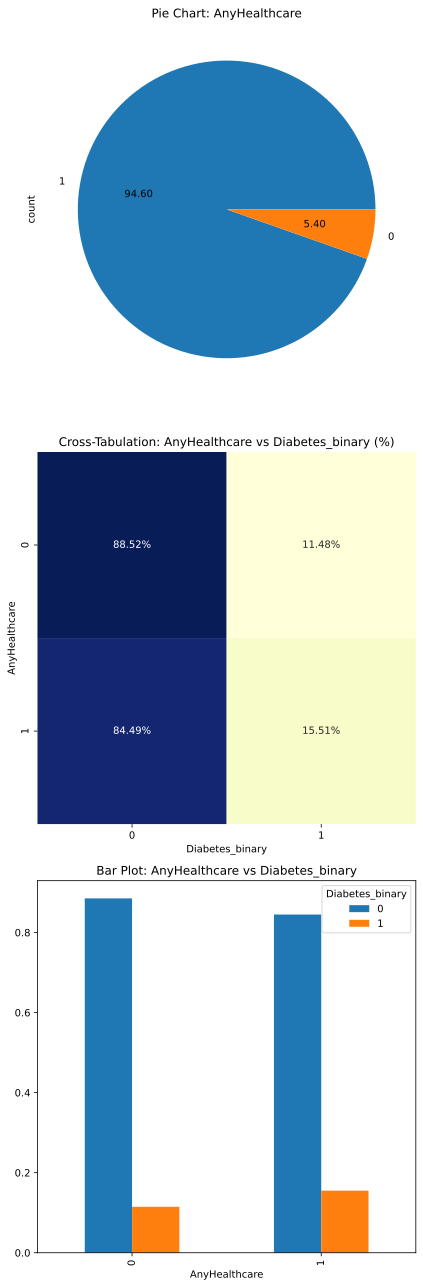

In [298]:
visualize_feature('AnyHealthcare' , df)

In [300]:
df.Diabetes_binary.corr(df.AnyHealthcare)

0.025331336307725192

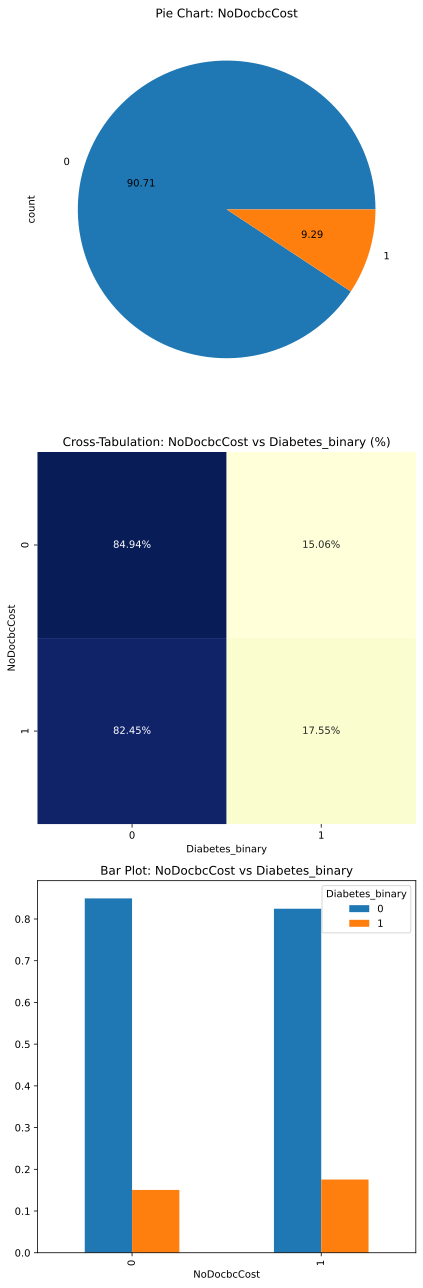

In [302]:
visualize_feature('NoDocbcCost' , df)

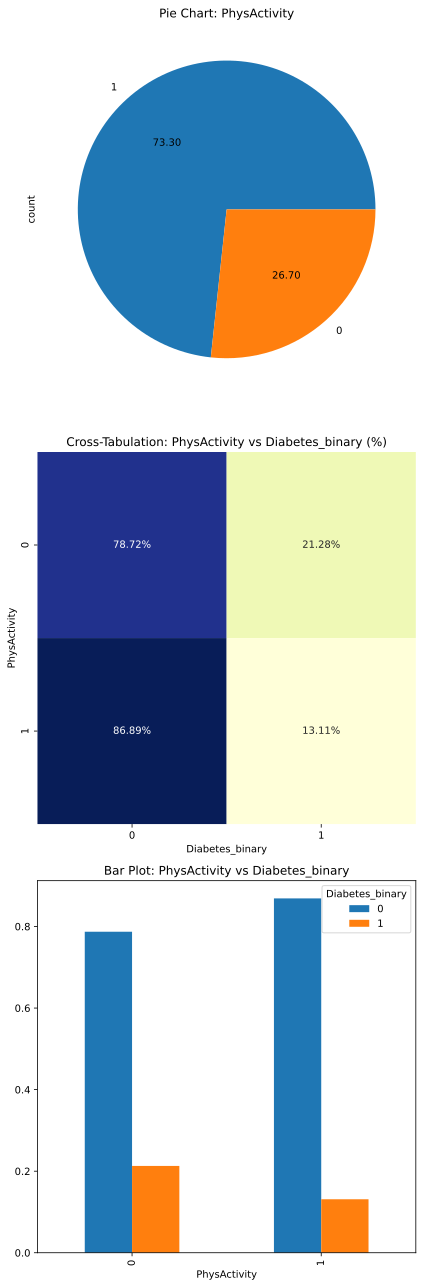

In [304]:
visualize_feature('PhysActivity' , df)

**Observation:**
- People who exercised frequently saw a lesser chance of developing diabetes.
- Access to healthcare plans did not seem to significantly impact how likely one was to develop diabetes
- People who could not access doctors due to financial constraints were just as likely to develop diabetes when compared against people who had access to healthcare.

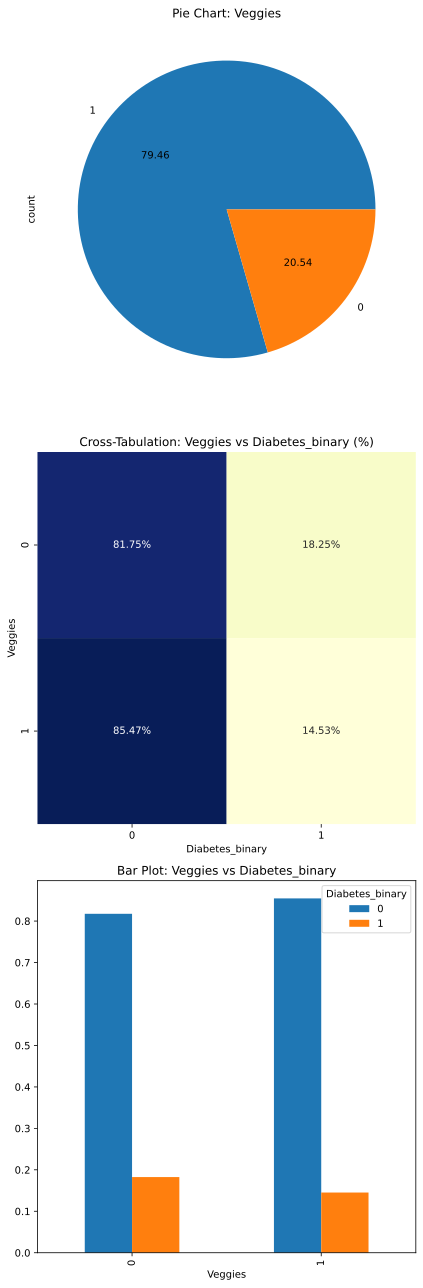

In [306]:
visualize_feature('Veggies' , df)

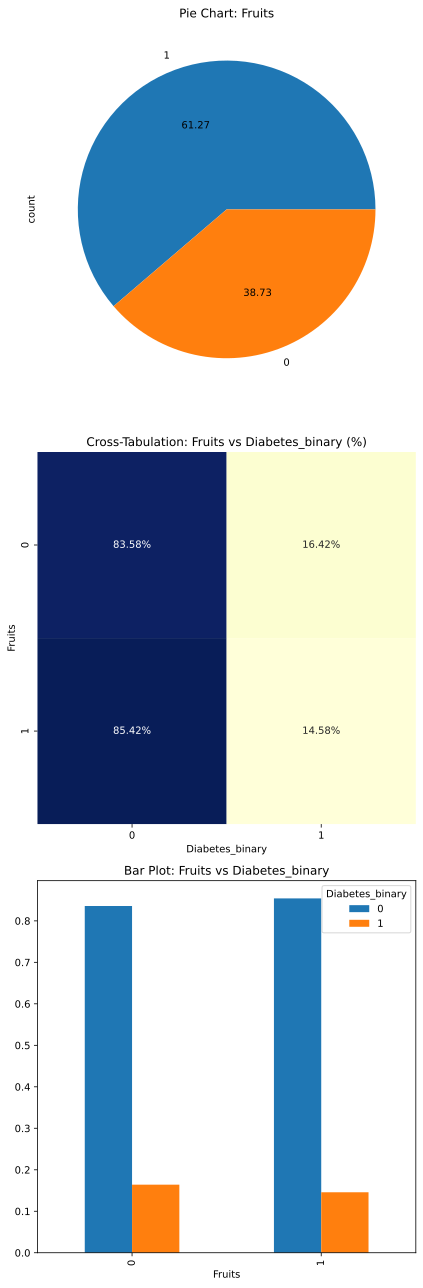

In [308]:
visualize_feature('Fruits' , df)

**Observation:**
People who consumed fruits and vegetables daily had a decreasd likelihood of developing diabetes

#### Age, Sex, Education, Income**

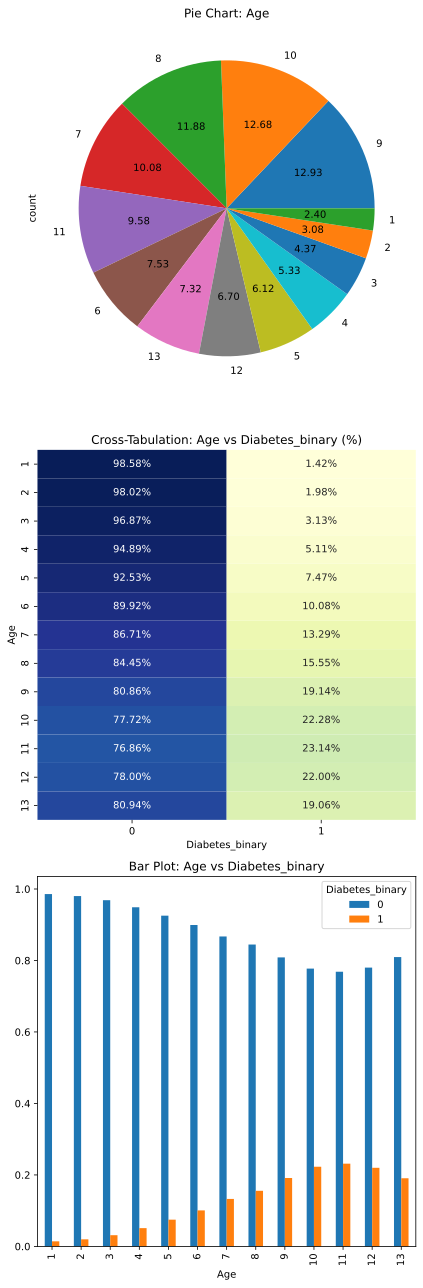

In [312]:
visualize_feature('Age' , df)

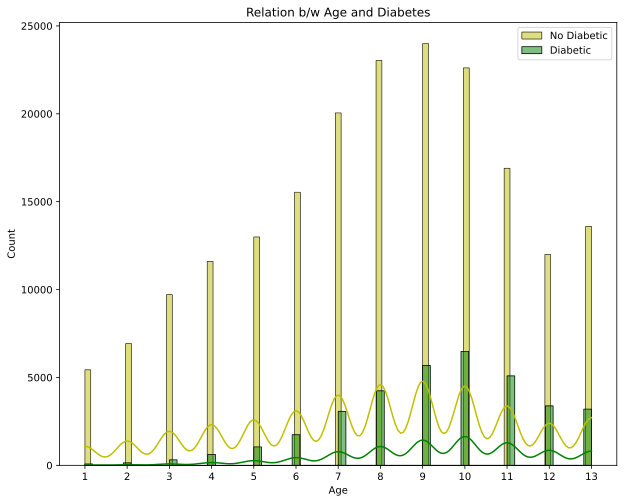

In [320]:
plt.figure(figsize=(10, 8))
sns.histplot(df.Age[df.Diabetes_binary == 0], color="y", label="No Diabetic" , kde = True )
sns.histplot(df.Age[df.Diabetes_binary == 1], color="g", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(df["Age"].unique())
plt.legend()
plt.show()

**Observation:**
As people grow onlder, their likelihood of developing diabetes increases

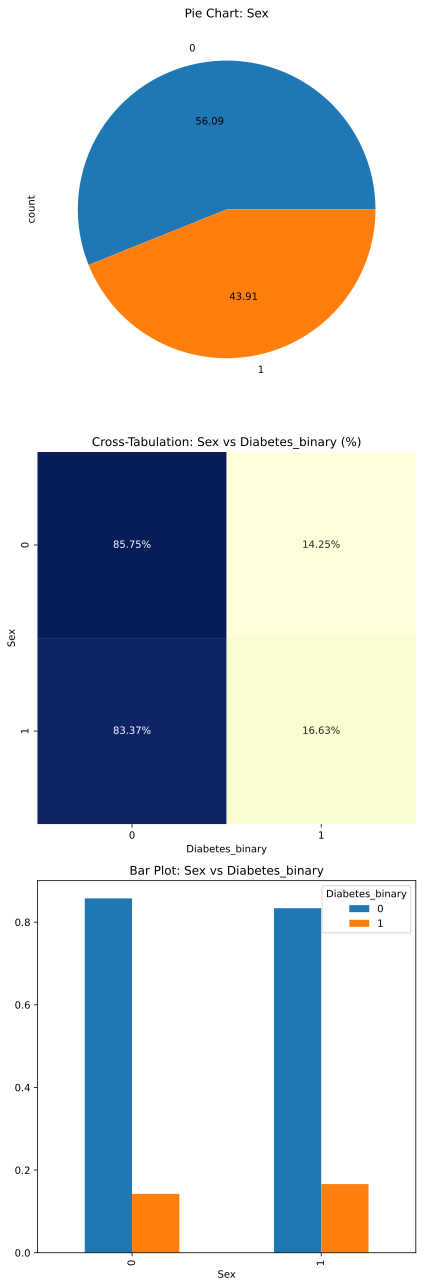

In [323]:
visualize_feature('Sex', df)

**Observation:**
Both men and women are equally likely to develop diabetes

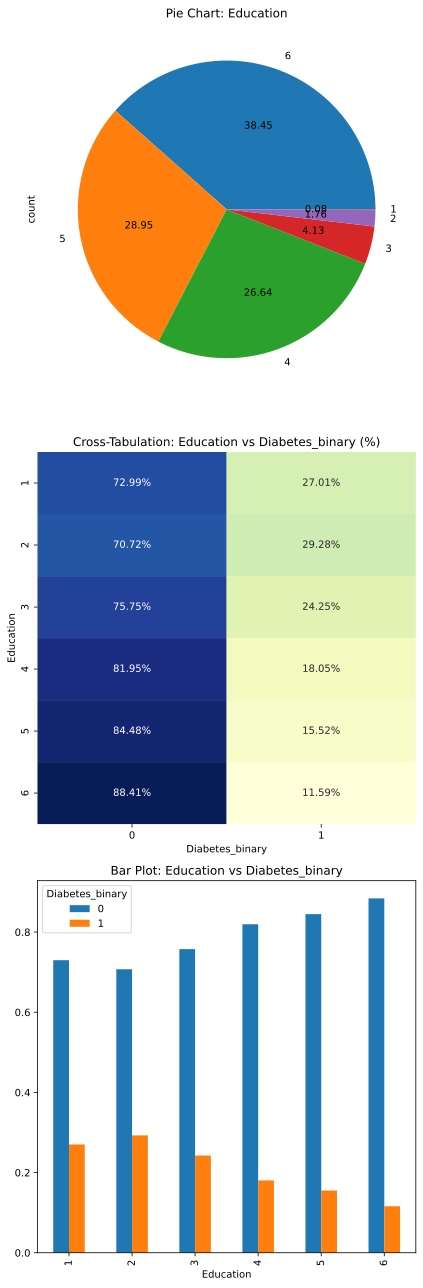

In [326]:
visualize_feature('Education' , df)

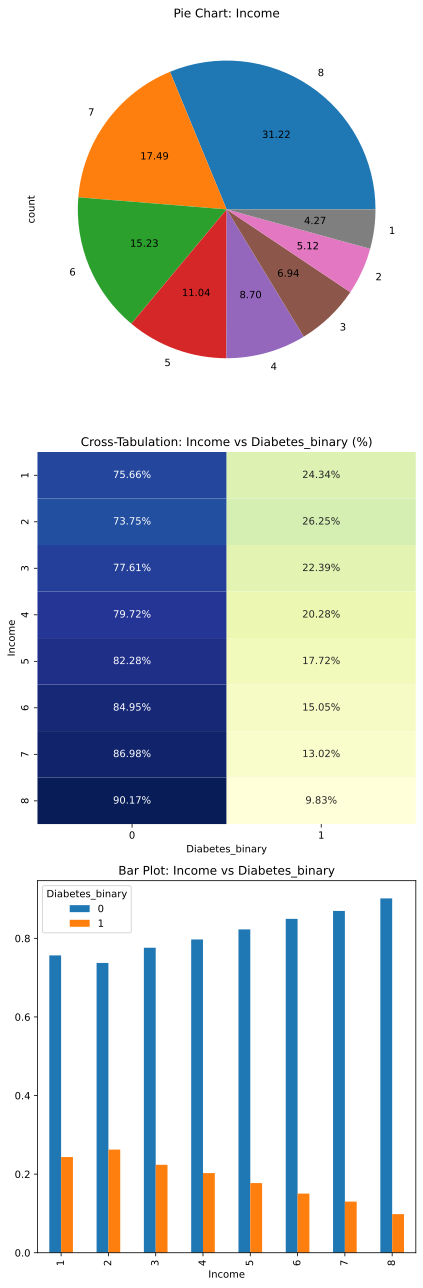

In [328]:
visualize_feature('Income' ,df)

**Observation:**
- People who are of age >= 45 are more vulnerable for diabetes
- People in lower income households are at greater risk of diabetes.

### Feature Selection

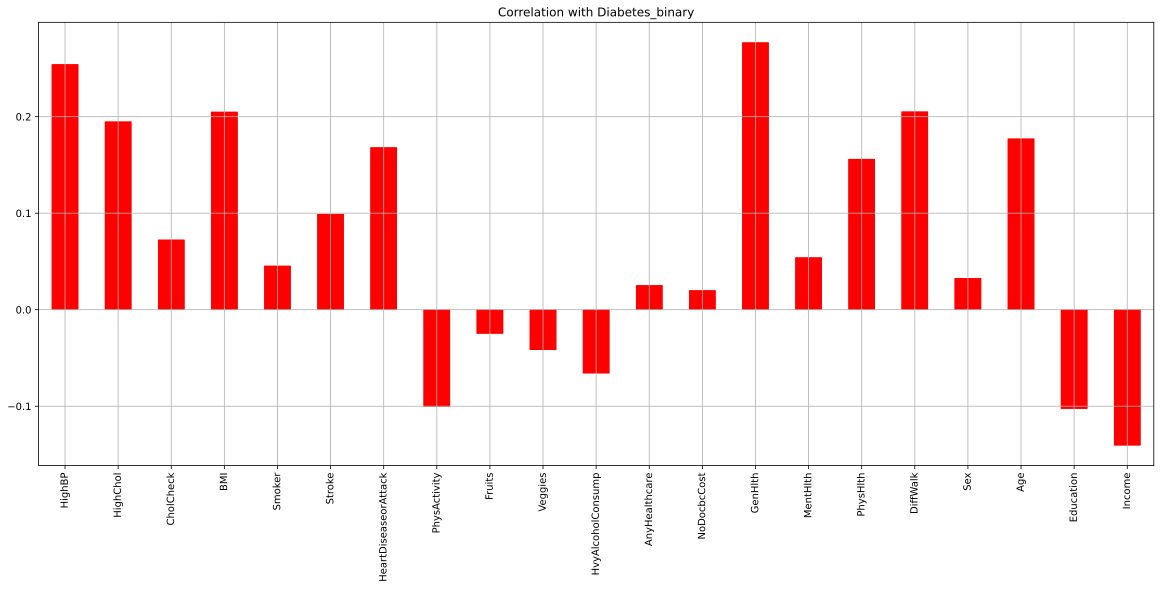

In [333]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Red");
plt.show()

Diabetes_binary's relation with other columns Through bar Graph Result:

1-Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2-HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

ANOVA Test

In [337]:
X = Original_data.iloc[:,1:]
Y = Original_data.iloc[:,0]

In [339]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif

In [341]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [343]:
pd.DataFrame(X_selected).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,40.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0


chi square

In [346]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [348]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


We will drop: "Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare"

In [353]:
columns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]

In [355]:
df.drop(columns , axis= 1 ,inplace=True)

In [357]:
df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1,1,40,1,0,0,0,0,0,5,18,15,1,9,4,3
1,0,0,0,25,1,0,0,1,0,1,3,0,0,0,7,6,1
2,0,1,1,28,0,0,0,0,0,1,5,30,30,1,9,4,8
3,0,1,0,27,0,0,0,1,0,0,2,0,0,0,11,3,6
4,0,1,1,24,0,0,0,1,0,0,2,3,0,0,11,5,4


### DATA Spliting

In [361]:
X=df.drop("Diabetes_binary",axis=1)
Y=df["Diabetes_binary"]

#### Handle Class imbalance

In [364]:
from imblearn.under_sampling import NearMiss

In [368]:
# Handling class imbalance using NearMiss to undersample the majority class
nm = NearMiss(version = 1 , n_neighbors = 10)
X_sm,Y_sm= nm.fit_resample(X,Y)

In [369]:
X_train , X_test , Y_train , Y_test = train_test_split(X_sm, Y_sm, test_size=0.25 , random_state=42)

#### DATA Scalling

In [371]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

#### MODELLING

In [373]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [378]:
#Logistic regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [380]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
cr = classification_report(Y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', cr)

Accuracy: 0.8464869793150607
Confusion Matrix:
 [[8127  624]
 [2070 6728]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      8751
           1       0.92      0.76      0.83      8798

    accuracy                           0.85     17549
   macro avg       0.86      0.85      0.85     17549
weighted avg       0.86      0.85      0.85     17549



**Using the lazy predict library to give us a hint of the best possible algorithm**

In [385]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [387]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [ ]:
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
hj
print(models)

### HYPERPARAMETER TUNING for LGBM, Adaboost, Logistics regression


Imports and Helper Functions

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Function to visualize metrics (confusion matrix and ROC curve)
def visualize_metrics(y_test, y_pred, y_pred_proba, model_name):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize Confusion Matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # AUC Score
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Visualize ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve: {model_name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    return auc_score


# Function to evaluate and visualize each model
def evaluate_and_visualize(model, X_train, X_test, Y_train, Y_test, model_name):
    # Start time measurement
    start_time = time.time()

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # for AUC calculation, binary classification

    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    cr = classification_report(Y_test, y_pred)

    # Calculate time taken
    end_time = time.time()
    time_taken = end_time - start_time

    # Print metrics
    print(f"\n{model_name} Model Results")
    print(f"Accuracy: {accuracy}")
    print(f"Time Taken: {time_taken:.2f} seconds")
    print(f"Classification Report:\n{cr}")

    # Visualize metrics
    auc_score = visualize_metrics(Y_test, y_pred, y_pred_proba, model_name)

    return accuracy, auc_score, time_taken

**1. LightGBM Model**

In [ ]:
# LightGBM Hyperparameter Tuning using Optuna
def objective_lgb(trial):
    params = {
        'objective': 'binary',   # Binary classification
        'metric': 'binary_logloss', # For binary classification
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
    }
    model = lgb.LGBMClassifier(**params)
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return score

# Create a study for LightGBM
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=20)
print("Best LightGBM Parameters:", study_lgb.best_params)

# Train the LightGBM model with best parameters
best_params_lgb = study_lgb.best_params
lgb_model = lgb.LGBMClassifier(**best_params_lgb)

# Evaluate and visualize the LightGBM model
evaluate_and_visualize(lgb_model, X_train, X_test, Y_train, Y_test, "LightGBM")

2. AdaBoost Model and Hyperparameter Tuning


[I 2024-11-13 04:55:03,083] A new study created in memory with name: no-name-e816b09e-d947-4b58-929c-afaff45fa085
[I 2024-11-13 04:55:16,219] Trial 0 finished with value: 0.8593218729224048 and parameters: {'n_estimators': 65, 'learning_rate': 0.4757233773192538}. Best is trial 0 with value: 0.8593218729224048.
[I 2024-11-13 04:55:36,091] Trial 1 finished with value: 0.8562066672998385 and parameters: {'n_estimators': 89, 'learning_rate': 0.16124703863010184}. Best is trial 0 with value: 0.8593218729224048.
[I 2024-11-13 04:56:05,877] Trial 2 finished with value: 0.8195270206097446 and parameters: {'n_estimators': 152, 'learning_rate': 0.00999910203675437}. Best is trial 0 with value: 0.8593218729224048.
[I 2024-11-13 04:56:27,333] Trial 3 finished with value: 0.8432899610599298 and parameters: {'n_estimators': 114, 'learning_rate': 0.04924335389300651}. Best is trial 0 with value: 0.8593218729224048.
[I 2024-11-13 04:56:37,080] Trial 4 finished with value: 0.8580681926108843 and param

Best AdaBoost Parameters: {'n_estimators': 173, 'learning_rate': 0.9667723622379572}

AdaBoost Model Results
Accuracy: 0.856003191065018
Time Taken: 7.77 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      8751
           1       0.92      0.79      0.85      8798

    accuracy                           0.86     17549
   macro avg       0.86      0.86      0.86     17549
weighted avg       0.86      0.86      0.86     17549



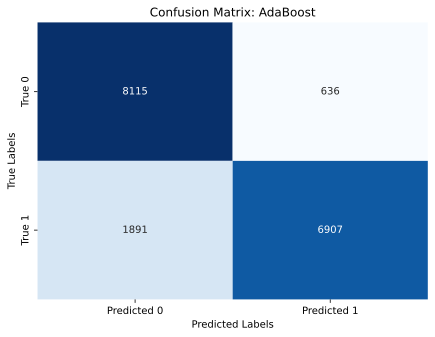

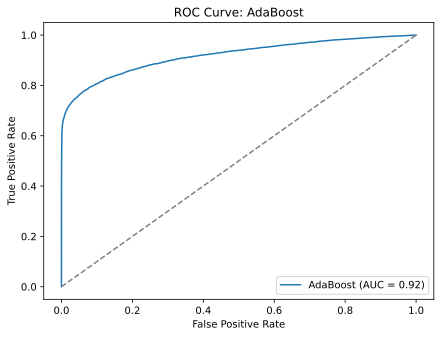

(0.856003191065018, 0.9180130460977551, 7.772000312805176)

In [ ]:
# AdaBoost Hyperparameter Tuning using Optuna
def objective_ada(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
    }
    model = AdaBoostClassifier(**params)
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return score

# Create a study for AdaBoost
study_ada = optuna.create_study(direction='maximize')
study_ada.optimize(objective_ada, n_trials=20)
print("Best AdaBoost Parameters:", study_ada.best_params)

# Train the AdaBoost model with best parameters
best_params_ada = study_ada.best_params
ada_model = AdaBoostClassifier(**best_params_ada)

# Evaluate and visualize the AdaBoost model
evaluate_and_visualize(ada_model, X_train, X_test, Y_train, Y_test, "AdaBoost")


3. Logistic Regression Model and Hyperparameter Tuning

[I 2024-11-13 05:03:53,210] A new study created in memory with name: no-name-6dc6f519-af7a-4a1a-beec-8c5256550808
[I 2024-11-13 05:03:55,770] Trial 0 finished with value: 0.8502231930857631 and parameters: {'C': 0.28505775837996367, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8502231930857631.
[I 2024-11-13 05:03:58,443] Trial 1 finished with value: 0.8506790768354069 and parameters: {'C': 0.9390721002174747, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8506790768354069.
[I 2024-11-13 05:04:01,246] Trial 2 finished with value: 0.8508310380852884 and parameters: {'C': 137.27642755088914, 'solver': 'liblinear'}. Best is trial 2 with value: 0.8508310380852884.
[I 2024-11-13 05:04:04,032] Trial 3 finished with value: 0.8508310380852884 and parameters: {'C': 312.95969912717044, 'solver': 'liblinear'}. Best is trial 2 with value: 0.8508310380852884.
[I 2024-11-13 05:04:05,748] Trial 4 finished with value: 0.8404216924684207 and parameters: {'C': 0.01954103936810866, 'solve

Best Logistic Regression Parameters: {'C': 11.985991567727986, 'solver': 'liblinear'}

Logistic Regression Model Results
Accuracy: 0.8465439626189526
Time Taken: 0.71 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      8751
           1       0.92      0.76      0.83      8798

    accuracy                           0.85     17549
   macro avg       0.86      0.85      0.85     17549
weighted avg       0.86      0.85      0.85     17549



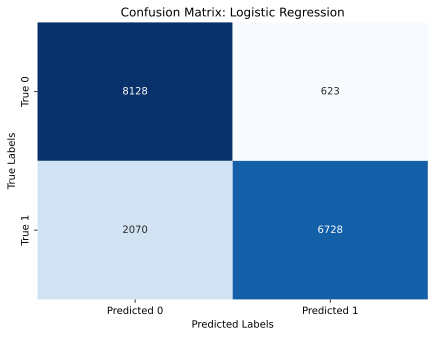

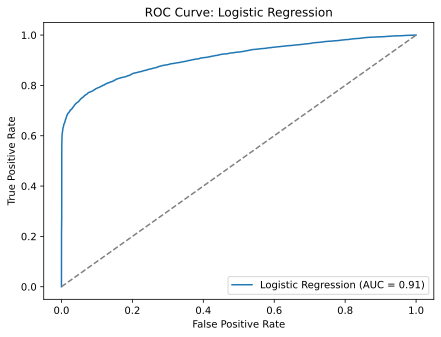

(0.8465439626189526, 0.909002605723052, 0.7098691463470459)

In [ ]:
# Logistic Regression Hyperparameter Tuning using Optuna
def objective_log_reg(trial):
    params = {
        'C': trial.suggest_loguniform('C', 1e-3, 1e3),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs']),
    }
    model = LogisticRegression(**params, max_iter=1000)
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return score

# Create a study for Logistic Regression
study_log_reg = optuna.create_study(direction='maximize')
study_log_reg.optimize(objective_log_reg, n_trials=20)
print("Best Logistic Regression Parameters:", study_log_reg.best_params)

# Train the Logistic Regression model with best parameters
best_params_log_reg = study_log_reg.best_params
log_reg_model = LogisticRegression(**best_params_log_reg, max_iter=1000)

# Evaluate and visualize the Logistic Regression model
evaluate_and_visualize(log_reg_model, X_train, X_test, Y_train, Y_test, "Logistic Regression")

Final model selected - LGBM

In [394]:
from lightgbm import LGBMClassifier
final_model = LGBMClassifier(random_state=42)
final_model.fit(X_train, Y_train)

# Predict and evaluate on the test set
y_pred = final_model.predict(X_test)
print("\nLGBMClassifier evaluation:\n")
print(classification_report(Y_test, y_pred))

[LightGBM] [Info] Number of positive: 26299, number of negative: 26346
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 52645, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499554 -> initscore=-0.001786
[LightGBM] [Info] Start training from score -0.001786

LGBMClassifier evaluation:

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      8751
           1       0.93      0.79      0.86      8798

    accuracy                           0.87     17549
   macro avg       0.88      0.87      0.87     17549
weighted avg       0.88      0.87      0.87     17549

